In [29]:
import math
import random
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [30]:
def class_times(df0):
    df2 = df0 
    student_keys = df2.STUDENTSOURCEKEY.unique()
    key = random.choice(student_keys)
    df1 = df2.loc[df2['STUDENTSOURCEKEY'] == key]
    tot_creds = df1['CREDITSATTEMPTED'].sum()
    class_dict = defaultdict(int)
    for i,j in df1.iterrows():
        x = j['CLASSMEETINGPATTERN'].replace('-',',')
        x = x.split(',')
        for days in x:
            class_dict[days] += j['timeofclass'] 
    return class_dict,tot_creds

In [31]:
###########ALLOCATION OF TIMES TO RANDOM ACTIVITIES 
def allocation(days,class_dict,tot_creds):
    my_dict = defaultdict(lambda : list())
    dict_bottom = defaultdict(lambda : list())

    for i,j in enumerate(days):
        #starting count timer = 0
        timer = 0
        
        #1sleep time generation
        sleep_time = abs(math.floor(random.normalvariate(8.8,1.22)*60))
        my_dict['sleep'].append(sleep_time)  #calculated in hrs and converted to mins
        #update sleep time
        timer += sleep_time
        dict_bottom['class_time'].append(sleep_time)

        #2 class_time imported from the excel data
        class_time = class_dict[j]
        my_dict['class_time'].append(class_time)
        timer += class_time
        dict_bottom['eat_time'].append(dict_bottom['class_time'][i]+class_time)
       
        #3 eat time mean = 84 mins and sd = 5
        eat_time = abs(math.floor(random.normalvariate(64,50)))
        my_dict['eat'].append(eat_time)  #calculated in mins
        timer += eat_time
        dict_bottom['commute'].append(dict_bottom['eat_time'][i]+eat_time)

        #5 commute time in mins      
        commute_time = abs(math.floor(random.normalvariate(4.997908,5.651849))/5)*60
        my_dict['commute'].append(commute_time)
        timer += commute_time
        dict_bottom['work'].append(dict_bottom['commute'][i]+commute_time)

        #6 work on campus
        work_time = abs(math.floor(random.normalvariate(4.945607,8.574569))/5)*60
        my_dict['work'].append(work_time)
        timer += work_time
        dict_bottom['social'].append(dict_bottom['work'][i]+work_time)

        #7 socializing time in mins
        time_socializing = abs(math.floor(random.normalvariate(12.947699,8.530829))/5)*60
        my_dict['social'].append(time_socializing)
        timer += time_socializing
        dict_bottom['hw'].append(dict_bottom['social'][i]+time_socializing)
        
        #8 HW allocation
        hw = ((abs(math.floor(random.normalvariate(1.39,0.924388))) * tot_creds)/5) * 60
        my_dict['hw'].append(hw)  
#         tot_hw_rem -= hw
        timer += hw 
    
        dict_bottom['residuals'].append(dict_bottom['hw'][i]+time_socializing)

        #9 residual time in mins
#         print('timer is : ',timer)
        my_dict['residuals'].append(1440-timer)
        #print(my_dict)
        cummulative = []
        for i in my_dict.keys():
            cummulative.append(sum(my_dict[i]))
        
        cumm_class = []
        for i in my_dict.keys():
            cumm_class.append(sum(my_dict[i]))
        
    return my_dict,dict_bottom,cummulative,cumm_class

In [32]:
def plot_daily(my_dict,dict_bottom):
    N = 5
    sleep_times = my_dict['sleep']
    class_times =my_dict['class_time']
    commute_times = my_dict['commute']
    eat_times = my_dict['eat']
    work_times = my_dict['work']
    time_socializing = my_dict['social']
    hw_time = my_dict['hw']
    residual_times = my_dict['residuals']

    ind = np.arange(N)  
    width = 0.75      

    plt.figure(figsize=(7,5))
    p1 = plt.bar(ind, sleep_times, width)
    p2 = plt.bar(ind, class_times,width,bottom = dict_bottom['class_time'])
    p3 = plt.bar(ind, commute_times, width,bottom = dict_bottom['commute'])
    p4 = plt.bar(ind, eat_times,width,bottom = dict_bottom['eat_time'])
    p5 = plt.bar(ind, work_times,width,bottom= dict_bottom['work'])
    p6 = plt.bar(ind, time_socializing,width,bottom= dict_bottom['social'])
    p7 = plt.bar(ind, hw_time,width,bottom = dict_bottom['hw'])
    p8 = plt.bar(ind, residual_times,width,bottom= dict_bottom['residual'])

    plt.ylabel('minutes')
    plt.title('day of the week')
    plt.xticks(ind, ('Monday','Tuesday','Wednesday','Thursday','Friday'))
#     plt.yticks(np.arange(0,600,1440))
    plt.legend((p1[0], p2[0],p3[0],p4[0],p5[0],p6[0],p7[0],p8[0]), ('sleep','class', 'commute','eat','work','social','hw','Residuals'),
                               bbox_to_anchor=(1.1,0.7), loc="lower right", 
                              bbox_transform=plt.gcf().transFigure)
    plt.show()
    return

In [33]:
def plot_weekly(my_dict,cummulative):
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = my_dict.keys()
    sizes = cummulative
    explode = (0,0,0,0,0,0,0,0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            startangle=120)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#     plt.savefig('time.png',dpi = 1080)
    plt.show()
    return

In [34]:
# n,m = class_times(df0)
# x,y,z1,z2 = allocation(days,n,m)
# # plot_daily(x,y )
# plot_weekly(x,z1)
# plot_weekly(x,z2)
# # x,y,z1,z2
# x

In [35]:
df1 =pd.read_excel('spring_2017.xlsx')

In [36]:
drops = ['Arranged','To Be Determined','Unknown','Unspecified']
days = ['Monday','Tuesday','Wednesday','Thursday','Friday']
df0 = df1[~df1.CLASSMEETINGPATTERN.isin(drops)]
df0 = df0[df0.PROGRAM.isin(['Engnr & Appl Sci Bachelor', 'Engnr & Appl Sci Masters',
           'Engnr & Appl Sci SBSQ Bachelor','Engnr & Appl Sci Comb Bachelor'])]
df0 = df0.drop_duplicates()
drops = ['Arranged','To Be Determined','Unknown','Unspecified']
drop_indexes = []
for i,j in df0.iterrows():
    if j['CLASSMEETINGPATTERN'] in drops:
        drop_indexes.append(i)
df0 = df0.drop(drop_indexes)
df0.reset_index(inplace=True)
times = []
for i in range(len(df0)):
    if df0.CLASSSTARTTIME[i] != 'Unknown' and df0.CLASSENDTIME[i] != 'Unknown':
        end = pd.to_datetime(df0.CLASSENDTIME[i]) 
        start = pd.to_datetime(df0.CLASSSTARTTIME[i])
        time = pd.Timedelta(end - start) / np.timedelta64(1, 'm')
        times.append(time)
    else:
        times.append(0)
df0['timeofclass'] = times
dfn=df0

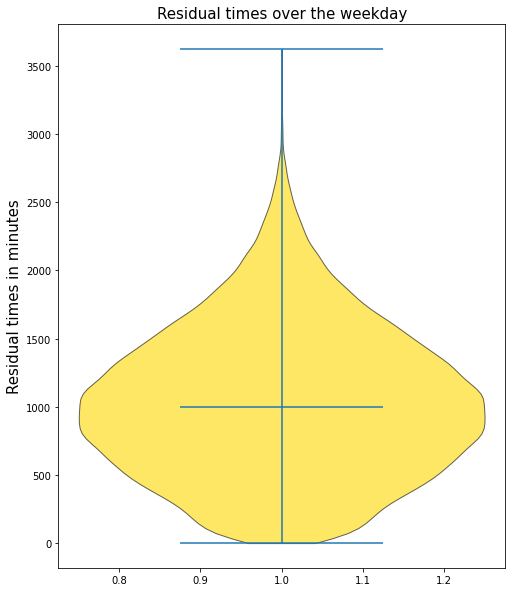

In [37]:
negatives_x = []
negatives_y = []
residual_times = []
for i in range(1500):
#     print(i)
    n,m = class_times(dfn)
    residual_times_ind = []
    for j in range(50):        
        a,b,c1,c2 = allocation(days,n,m)
        residual_times.append(c1[-1])
        if c1[-1] <0:
            negatives_x.append(a)
            negatives_y.append(b)
#             print('OBSERVE')
#             break
#     break
residuals = [residual for residual in residual_times if residual>=0]
fig,ax = plt.subplots(figsize=(8,10))
part = ax.violinplot(residuals,vert=True,showmedians=True)

for pc in part['bodies']:
    pc.set_facecolor('gold')
    pc.set_edgecolor('black')
    pc.set_alpha(0.6)

    
ax.set_ylabel('Residual times in minutes',fontsize =15)
plt.title('Residual times over the weekday',fontsize =15)

plt.show()

In [38]:
'mean : ' ,np.mean(residuals), 'std deviation : ' ,np.std(residuals)

('mean : ', 1036.8670141009075, 'std deviation : ', 551.3404136879725)